<a href="https://colab.research.google.com/github/sainirajesh17/Global_Terrorism_Analysis_EDA/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
# We will start with importing some important libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [ ]:
# Mounting the Drive
 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the required data from the drive

file_path = "/content/drive/MyDrive/Capstone project/Global_Terrorism_Data (1).csv"
terrorism_data = pd.read_csv(file_path, encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
terrorism_data.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


In [ ]:
terrorism_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
# checking the shape of the data

terrorism_data.shape

(181691, 135)

In [ ]:
terrorism_data.info(verbose= True, null_counts = True)

## We will take only those columns which are needed for our analysis

In [ ]:
terrorism_data_new = terrorism_data[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city','latitude', 'longitude', 'success', 'attacktype1_txt', 'targtype1_txt', 'gname', 'weaptype1_txt', 'nkill', 'ransom']]

In [ ]:
# Checking our new updated dataframe

terrorism_data_new.head(2)

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,ransom
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,1.0


In [ ]:
terrorism_data_new.shape

(181691, 16)

In [ ]:
# Now we will rename our columns

terrorism_data_new = terrorism_data_new.rename(columns= {'iyear' : 'year','imonth' : 'month', 'iday' : 'day', 'country_txt' : 'country', 'region_txt' : 'region', 'provstate' : 'state', 'attacktype1_txt' : 'attack_type', 'targtype1_txt' : 'target_type', 'gname' : 'gang_name', 'weaptype1_txt' : 'weapon_type', 'nkill' : 'no_of_kills'  })

In [ ]:
terrorism_data_new.head(2)

,year,month,day,country,region,state,city,latitude,longitude,success,attack_type,target_type,gang_name,weapon_type,no_of_kills,ransom
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,1.0


In [ ]:
terrorism_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   country      181691 non-null  object 
 4   region       181691 non-null  object 
 5   state        181270 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   success      181691 non-null  int64  
 10  attack_type  181691 non-null  object 
 11  target_type  181691 non-null  object 
 12  gang_name    181691 non-null  object 
 13  weapon_type  181691 non-null  object 
 14  no_of_kills  171378 non-null  float64
 15  ransom       77381 non-null   float64
dtypes: float64(4), int64(4), object(8)
memory usage: 22.2+ MB


In [ ]:
# Handeling the Nan values
 
terrorism_data_new['state'] = terrorism_data_new['state'].fillna('unknown')
terrorism_data_new['city'] = terrorism_data_new['city'].fillna('unknown')
terrorism_data_new['no_of_kills'] = terrorism_data_new['no_of_kills'].fillna(0)


In [ ]:
terrorism_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   country      181691 non-null  object 
 4   region       181691 non-null  object 
 5   state        181691 non-null  object 
 6   city         181691 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   success      181691 non-null  int64  
 10  attack_type  181691 non-null  object 
 11  target_type  181691 non-null  object 
 12  gang_name    181691 non-null  object 
 13  weapon_type  181691 non-null  object 
 14  no_of_kills  181691 non-null  float64
 15  ransom       77381 non-null   float64
dtypes: float64(4), int64(4), object(8)
memory usage: 22.2+ MB


In [ ]:
terrorism_data_new.isnull().sum()


year                0
month               0
day                 0
country             0
region              0
state               0
city                0
latitude         4556
longitude        4557
success             0
attack_type         0
target_type         0
gang_name           0
weapon_type         0
no_of_kills         0
ransom         104310
dtype: int64

## <b> 1. hot zones

## <b> Total number of attacks in every year by region ****


In [ ]:
attacks_per_year = terrorism_data_new.groupby(['year', 'region']).count().unstack()['country']
attacks_per_year

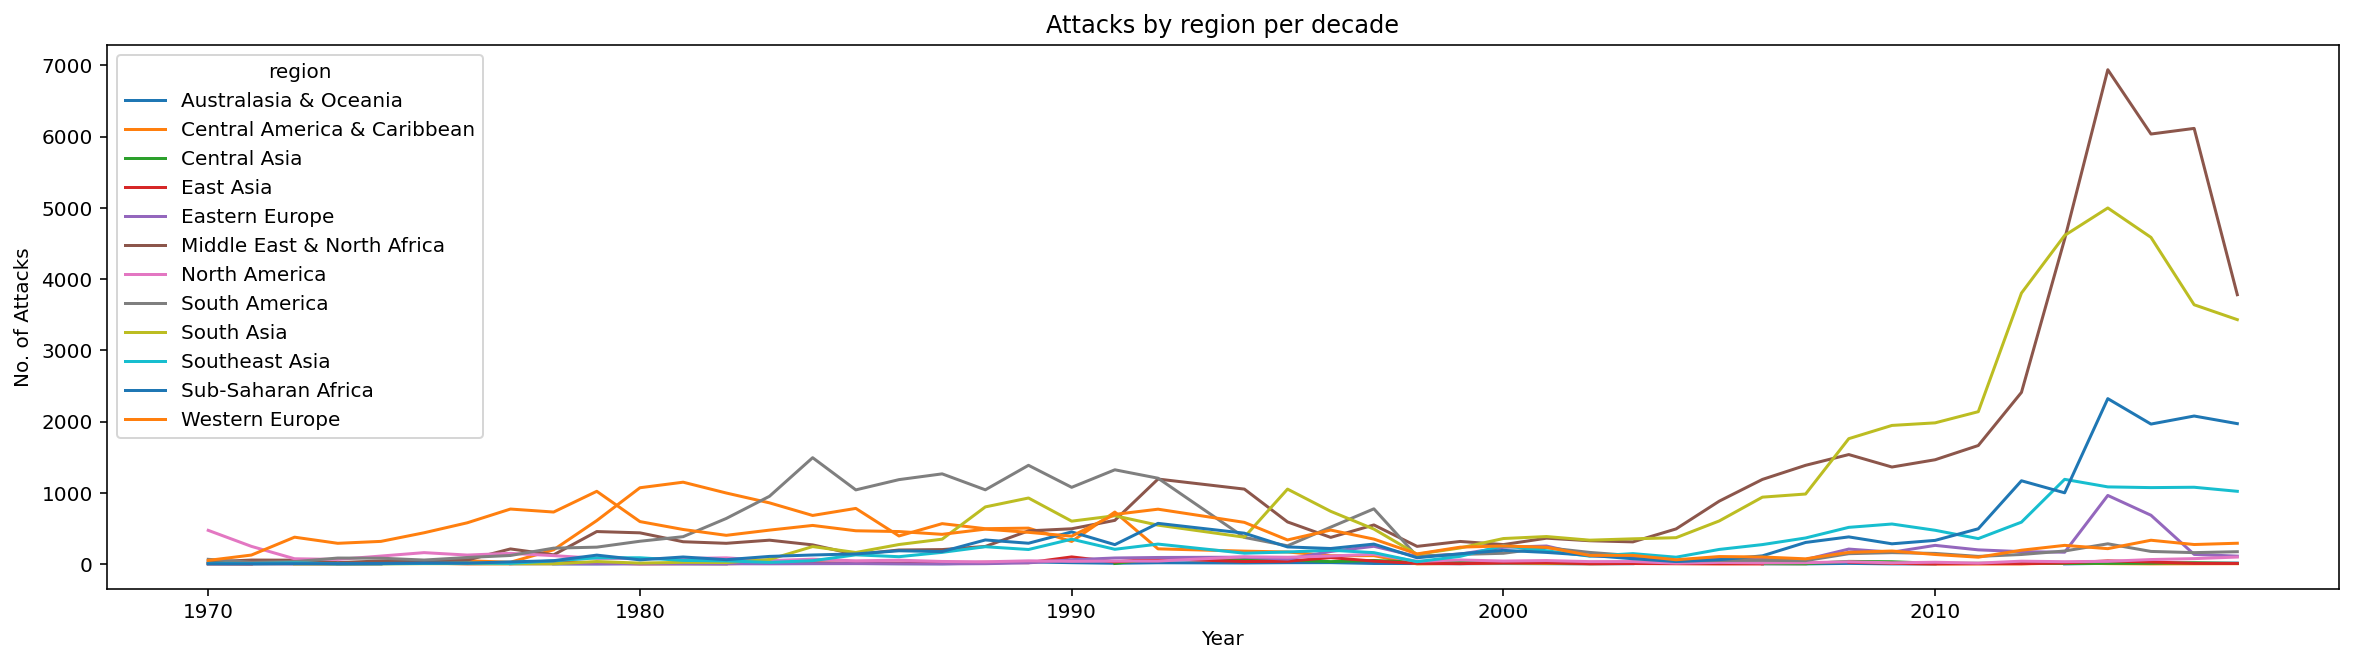

In [ ]:
attacks_per_year.plot()

plt.title('Attacks by region per decade')
plt.ylabel('No. of Attacks')
plt.xlabel('Year')

plt.rcParams['figure.figsize'] = (20, 5)

## <b> most attacked countries i.e middle east &  north africa by decade

In [ ]:
terrorism_data_new['region'] == 'Middle East & North Africa'

trend = terrorism_data_new[terrorism_data_new['region'] == 'Middle East & North Africa']['year']

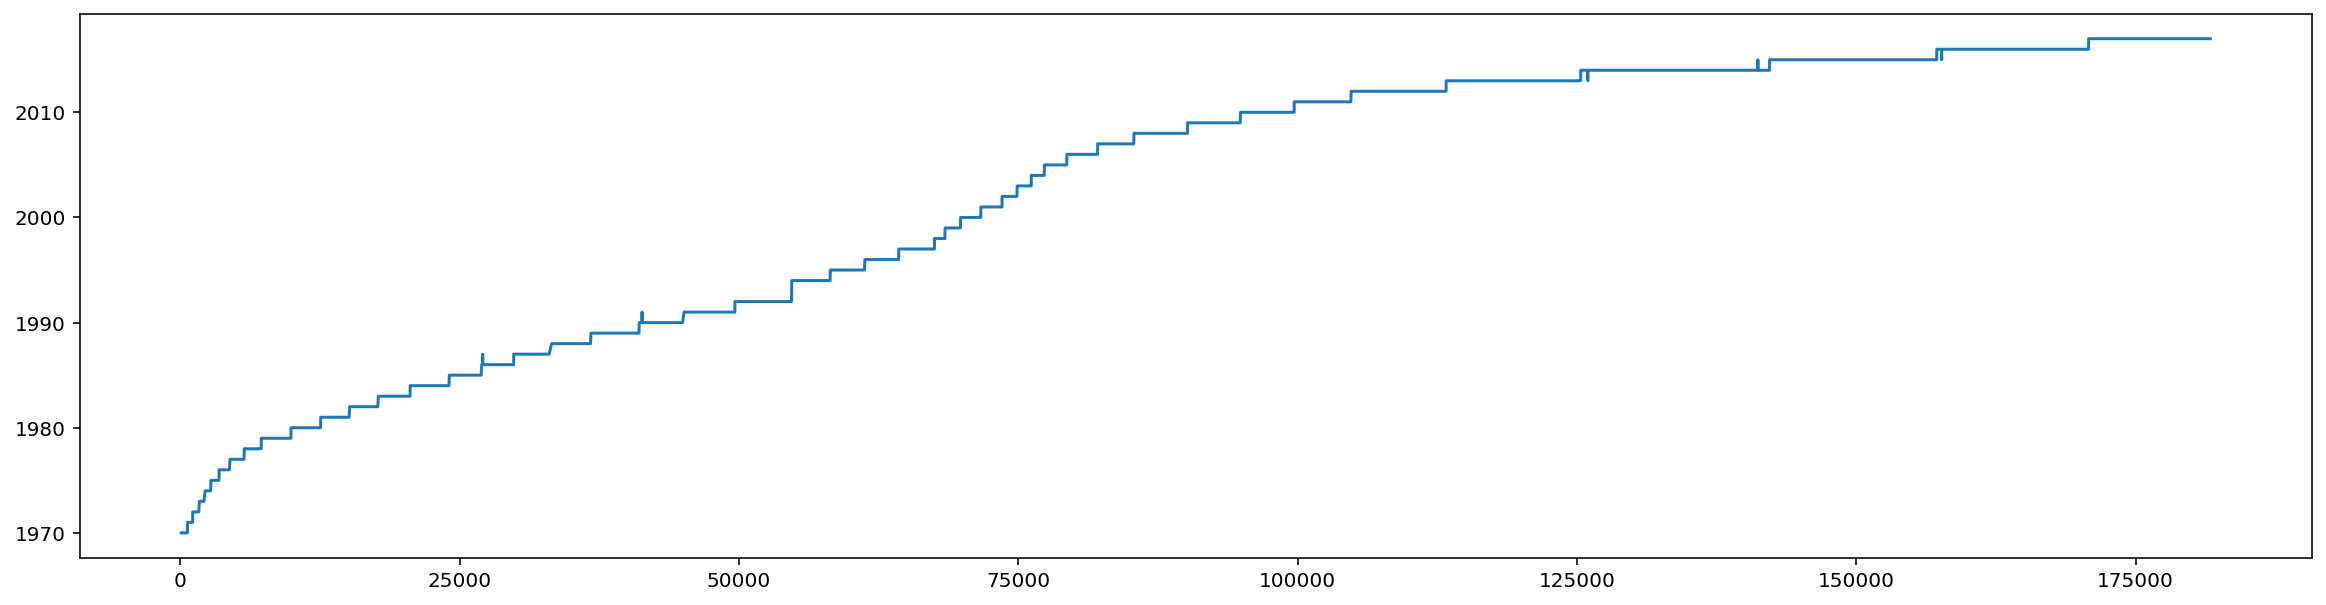

In [ ]:
trend.plot()

## <b> 2. attack by year

In [ ]:
yearly_trend = terrorism_data_new.year.value_counts().sort_index(ascending=True)

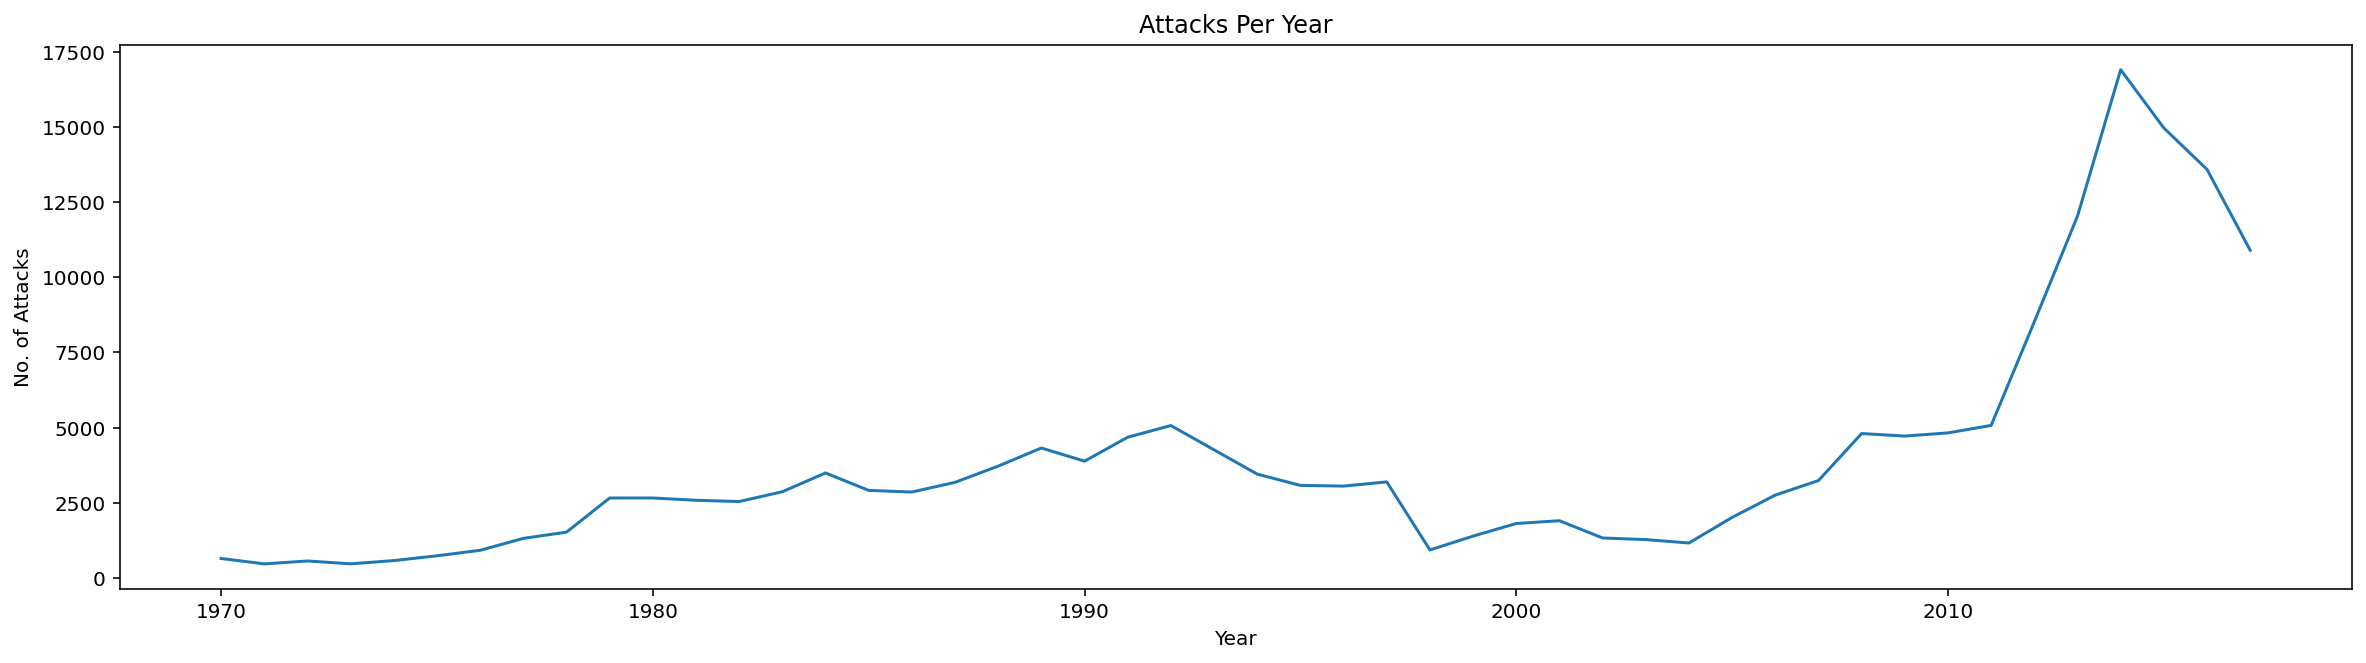

In [ ]:
yearly_trend.plot(kind = 'line')

plt.title('Attacks Per Year')
plt.ylabel('No. of Attacks')
plt.xlabel('Year')

plt.rcParams['figure.figsize'] = (20, 5)

## <b> For year 2014, which country was most attacked <b>

## <b> 3. top 10 countries attacked

In [ ]:
top_10_countries = terrorism_data_new['country'].value_counts().head(10)
top_10_countries

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country, dtype: int64

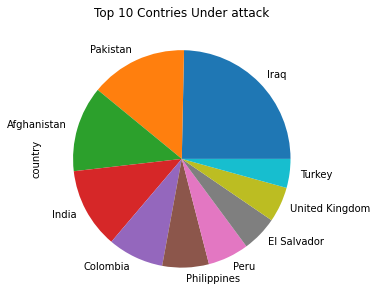

In [ ]:
top_10_countries.plot(kind = 'pie')

plt.title('Top 10 Contries Under attack')


plt.rcParams['figure.figsize'] = (20, 5)

## <b> 2.10.2 Why most dangerous country is most dangerous?


## <b> 4 . Top 5 states under attack *****

In [ ]:
top_5_states = terrorism_data_new['state'].value_counts().head(10)

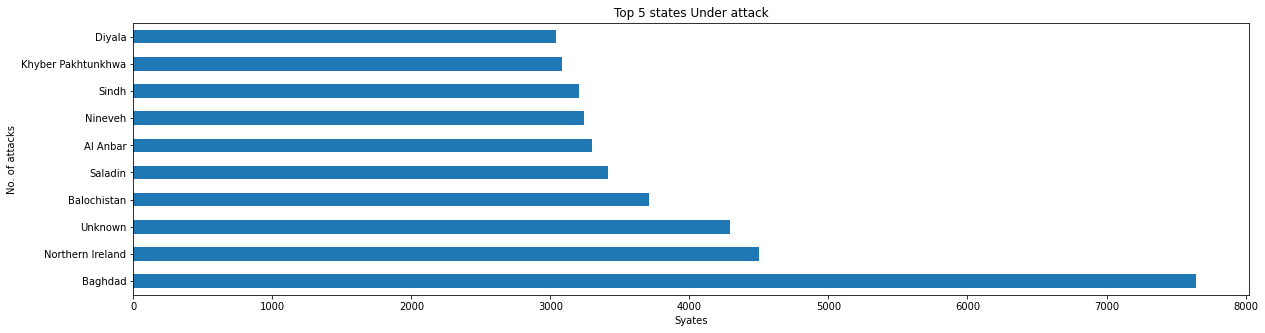

In [ ]:
top_5_states.plot(kind = 'barh')

plt.title('Top 5 states Under attack')
plt.ylabel('No. of attacks')
plt.xlabel('Syates')

plt.rcParams['figure.figsize'] = (10, 5)

## <b> 5.  Which attack type is the most common

In [ ]:
common_attack_type = terrorism_data_new['attack_type'].value_counts()

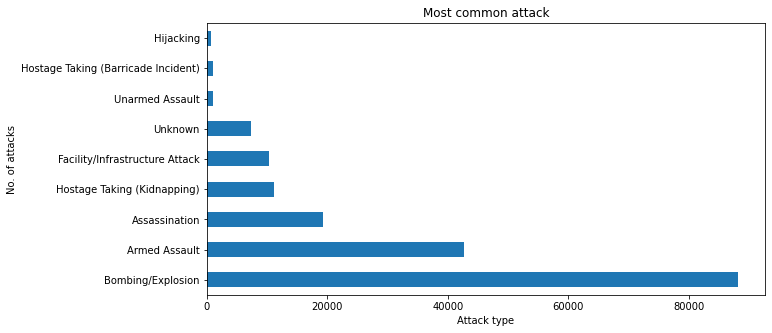

In [ ]:
common_attack_type.plot(kind = 'barh')

plt.title('Most common attack')
plt.ylabel('No. of attacks')
plt.xlabel('Attack type')

plt.rcParams['figure.figsize'] = (10, 5)

## <b> 6  :- Which gang attacked the most ***** <b>

In [ ]:
leading_gangs = terrorism_data_new['gang_name'].value_counts().head(10)

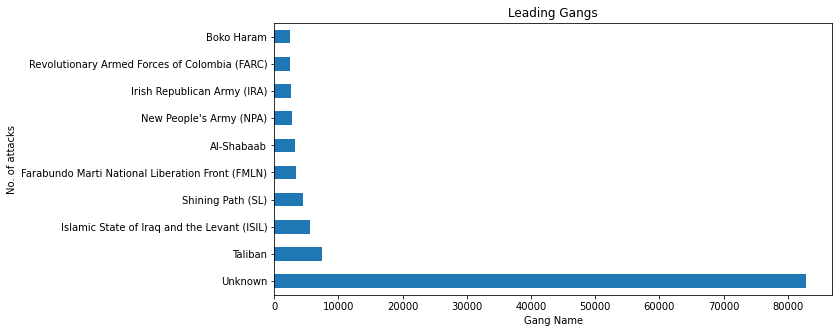

In [ ]:
leading_gangs.plot(kind = 'barh')

plt.title('Leading Gangs')
plt.ylabel('No. of attacks')
plt.xlabel('Gang Name')

plt.rcParams['figure.figsize'] = (10, 5)

## <b> which attack type is used by the most deadly gang :- Taliban

In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import squarify

In [ ]:
gname = "Taliban"
def treeplot(data,gang_name):
    plt.subplots(figsize=(15,10))
    w_t = pd.DataFrame(terrorism_data_new[terrorism_data_new['gang_name']==gname]['weapon_type'].value_counts())
    w_t.reset_index(level=0,inplace=True)
    t = squarify.plot(sizes=w_t["weapon_type"],label=w_t["index"],alpha=0.8)
    plt.show()

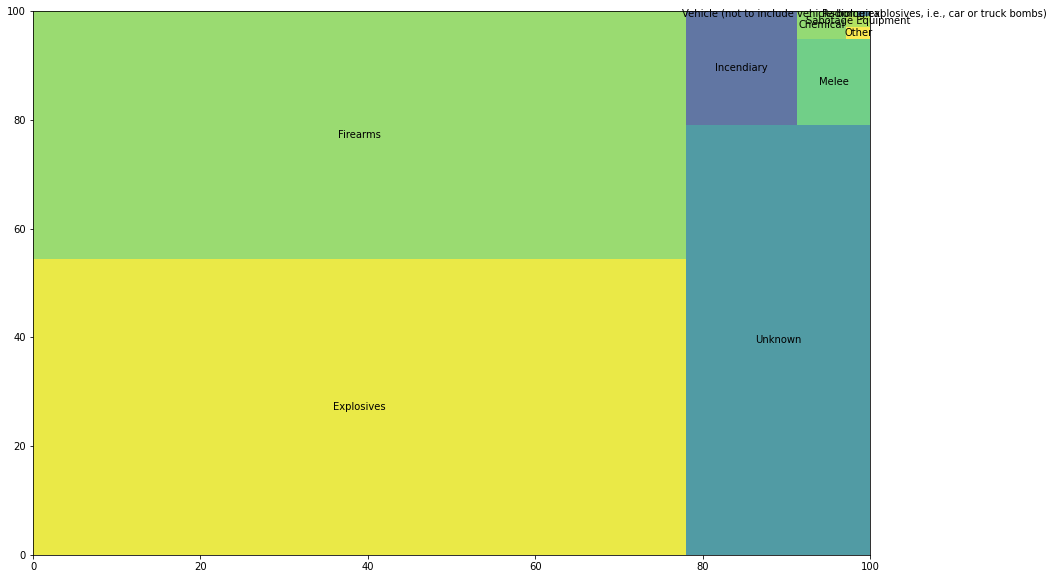

In [ ]:
treeplot(terrorism_data_new,"Taliban")

## Firearms and Explovies have been Taliban's favorite weapon type. This has been same for many terrorist groups.


## <b> 7 :- What was the most common target of the terrorist <b>

In [ ]:
common_targets = terrorism_data_new['target_type'].value_counts().head(10)

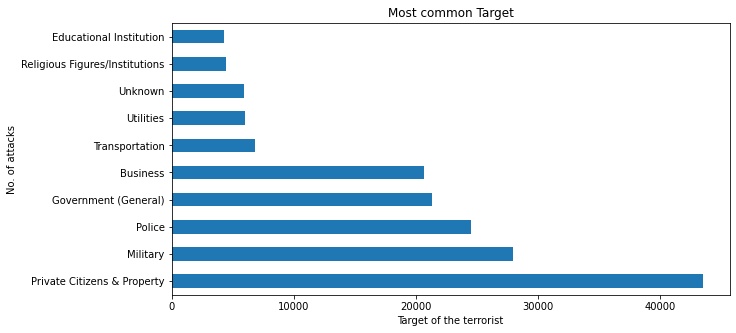

In [ ]:
common_targets.plot(kind = 'barh')

plt.title('Most common Target')
plt.ylabel('No. of attacks')
plt.xlabel('Target of the terrorist')

plt.rcParams['figure.figsize'] = (10, 5)

## <b> 8.** 4 no of kills

In [ ]:
casualties = terrorism_data_new.groupby('year').sum()['no_of_kills']

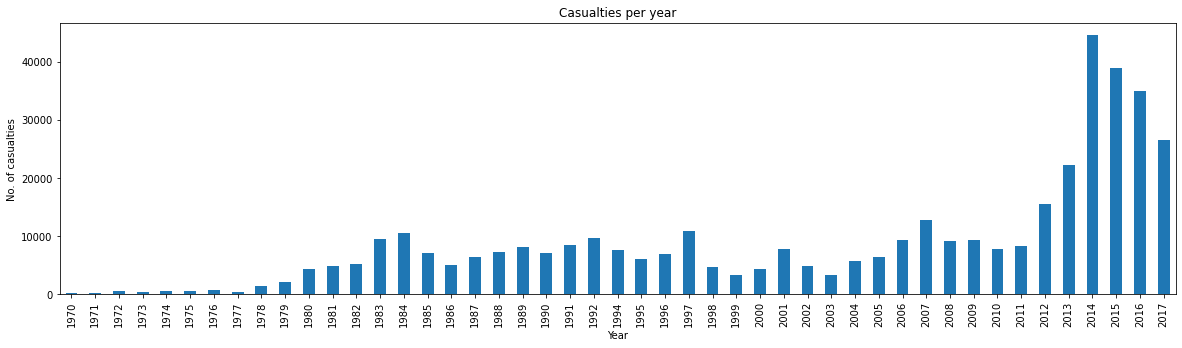

In [ ]:
casualties.plot(kind = 'bar')

plt.title('Casualties per year')
plt.ylabel('No. of casualties')
plt.xlabel('Year')

plt.rcParams['figure.figsize'] = (20, 5)


## <b> 9. success v/s failed attacts country wise

In [ ]:
attacks = terrorism_data_new.groupby(['success','region']).count()['attack_type'].reset_index()

In [ ]:
succ_attacks = attacks[attacks['success'] == 0]
x1 = succ_attacks.region.to_list()
y1 = succ_attacks.attack_type.to_list()

In [ ]:
fail_attacks = attacks[attacks['success'] == 1]
x2 = fail_attacks.region.to_list()
y2 = fail_attacks.attack_type.to_list()

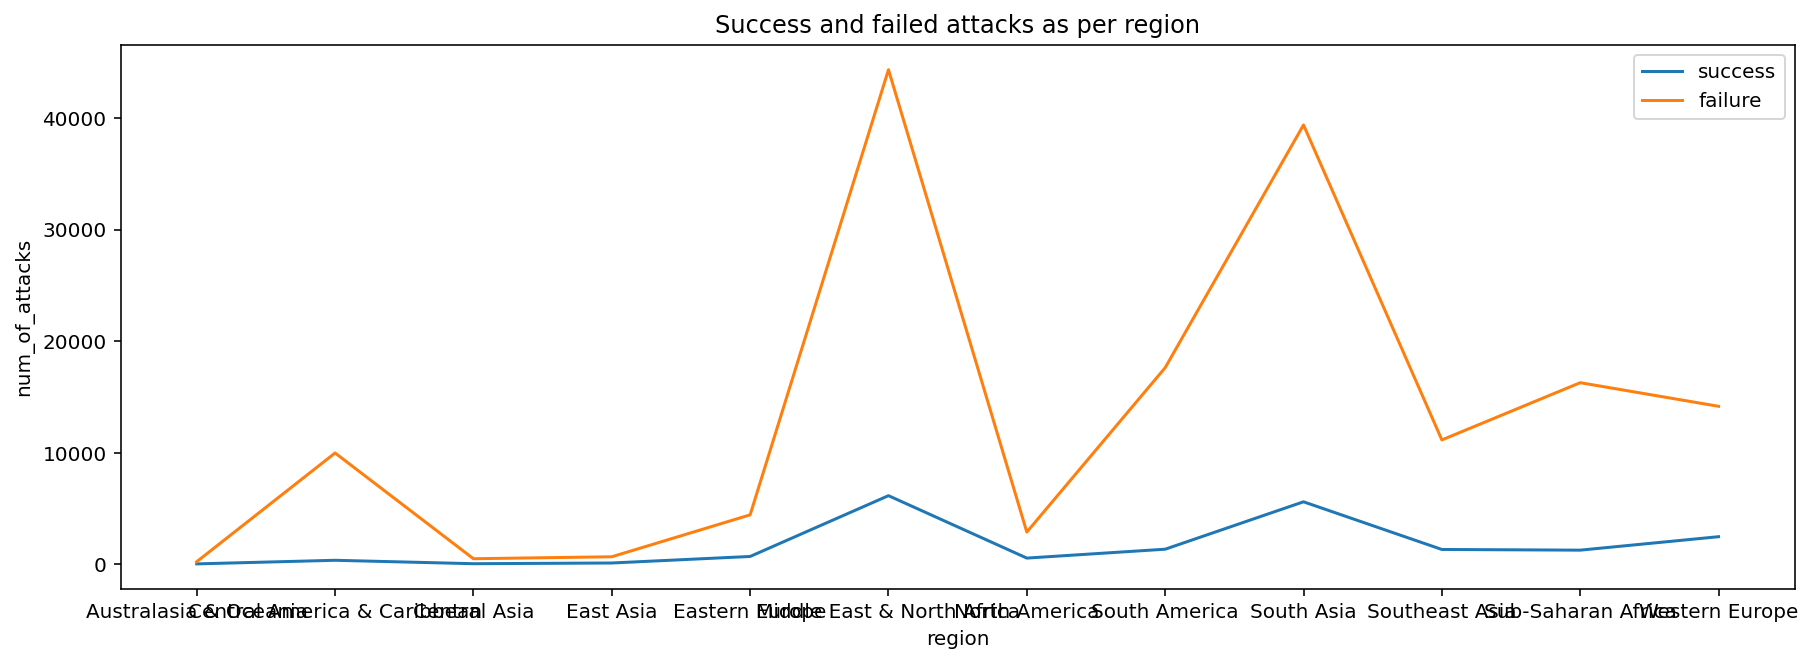

In [ ]:
# plotting the success points
plt.plot(x1, y1, label = "success")

# plotting the failure points
plt.plot(x2, y2, label = "failure")
plt.xlabel('region')

# Set the y axis label of the current axis.
plt.ylabel('num_of_attacks')

# Set a title of the current axes.
plt.title('Success and failed attacks as per region')

plt.rcParams['figure.figsize'] = (20, 5)

# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## 5. Challenges
The dataset countains huge number of classes (3,453) and the frequency of each class ranged from 1 to about 6,575; which lead to removal of few classes that had frequency less than a particular number. This clipping has to be done by setting "class_freq [threshold] = 11" i.e., classes with frequency less than 11 are removed. Decreasing this number will lead to better classification results. It was necessary to come up with a number that can include as much number of classes yet provide better and acceptable classification results.

The "Folium" API is used for chloropleth world map. The way it works is, it maps the country names with its corresponding geographic shape written in JSON, and then assigns the intensity of color with variable (number of kills, number of attacks etc). In order to make the mapping it was necessary to make sure that country text in the databse match with that of API. There were certain countries which had different names, for example : The database had "United States" but the API had "United States of America"; database had "East Germany", "West Germany" which in today's date are known as "Germany" so API had only "Germany". So these kind of data irregularities were resolved manually looking for each match in database and API.

## 6. Future Work
As discussed in Section 3., we can use a neural network that penalizes the misclassified classes, so that it can capture and learn the rare classes as well.

Given that we have learned the activities by almost all terrorist groups, can we predict the next move of such groups at given time and location? Such a task will require rigorous time series analysis and maybe more attributes to learn, like weather conditions, government body, economic status etc.